## **Computational Finance Option Pricing Models

In [92]:
## importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import seaborn as sns
from scipy.stats import norm

In [93]:
ticker = "NWG"
start = "2021-12-08"
end = "2023-12-08"
df = yf.download(ticker, start =start, end=end)

[*********************100%%**********************]  1 of 1 completed


**Expolatory Data Analysis**

In [94]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-08,6.314655,6.346983,6.293103,6.346983,5.171093,1671421
2021-12-09,6.260776,6.282328,6.217672,6.228448,5.074519,743142
2021-12-10,6.217672,6.228448,6.163793,6.196121,5.048182,680595
2021-12-13,6.142241,6.153017,6.099138,6.099138,4.969165,705280
2021-12-14,6.153017,6.239224,6.153017,6.206897,5.056961,920205


In [95]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,6.235003,6.288955,6.183279,6.237298,5.622370,1.649812e+06
std,0.654685,0.656569,0.657264,0.661726,0.606229,9.321490e+05
min,4.360000,4.400000,4.300000,4.330000,4.217501,0.000000e+00
25%,5.830000,5.871423,5.765086,5.824871,5.124466,1.066990e+06
50%,6.250000,6.293103,6.185345,6.239224,5.658474,1.388500e+06
75%,6.655000,6.716681,6.610000,6.670000,6.040258,1.981750e+06
max,7.750000,7.800000,7.700000,7.760000,7.107337,8.759114e+06


In [96]:
df['Adj Close'].describe()

count    503.000000
mean       5.622370
std        0.606229
min        4.217501
25%        5.124466
50%        5.658474
75%        6.040258
max        7.107337
Name: Adj Close, dtype: float64

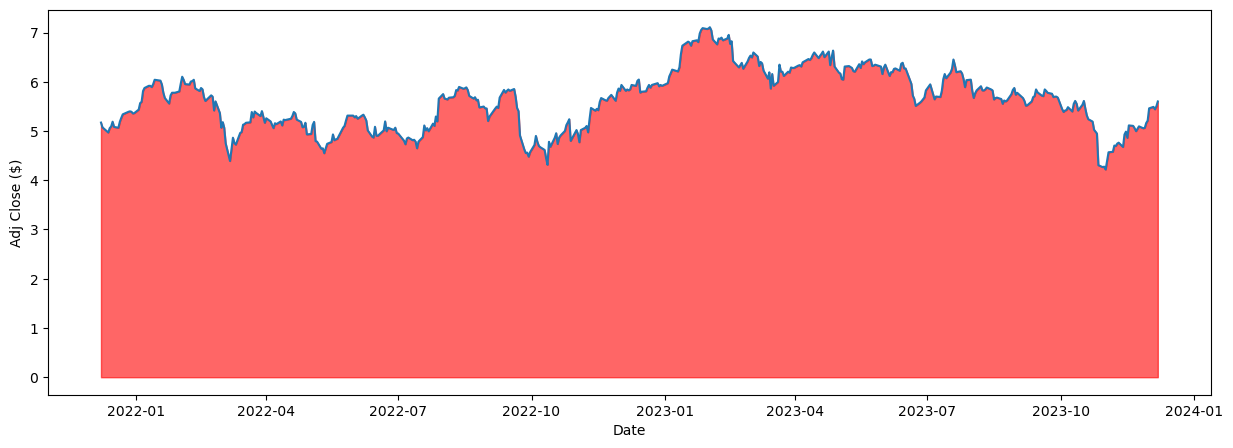

In [97]:
plt.figure(figsize=(15, 5))
plt.plot(df['Adj Close'])
plt.fill_between(df.index, df['Adj Close'], alpha=0.6, label='Filled Area', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close ($)')
plt.show()

In [98]:
opening_prices = np.array([df['Open']])
high_prices = np.array(df['High'])
low_prices = np.array(df['Low']) 
close_prices = np.array(df['Close'])

**Annualised returns**


In [99]:
returns = df['Close'].pct_change()
annualised_returns = (returns.mean() * 252).round(5) 
print(f'annualised returns: {annualised_returns}')

annualised returns: 0.00615


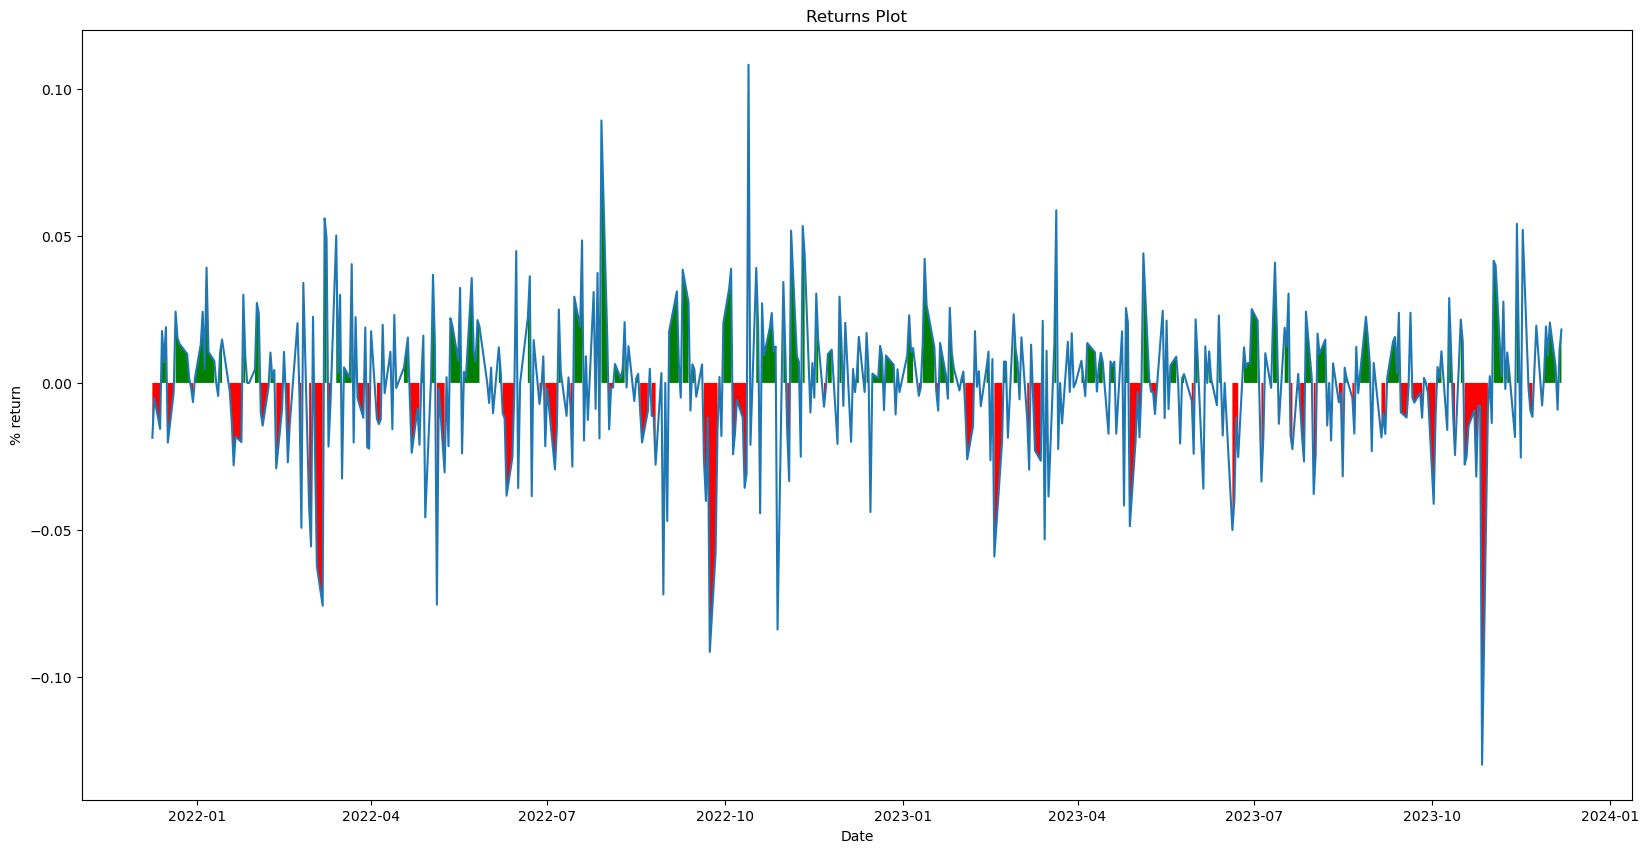

In [100]:
plt.figure(figsize=(20, 10))
plt.plot(returns)

plt.fill_between(df.index, 0, returns.where(returns > 0), facecolor='green', interpolate=True, label='Positive Returns')
plt.fill_between(df.index, 0, returns.where(returns < 0), facecolor='red', interpolate=True, label='Negative Returns')

plt.xlabel('Date') 
plt.ylabel('% return')  
plt.title('Returns Plot')  
plt.show()

**Another way of doing annualised returns**

In [101]:
num_years = 2
annualised_returns2 = ((1 + returns.mean()) ** (num_years) - 1).round(5)

annualised_returns2

5e-05

**Volatility**

In [102]:
num_years = 2 # I'm Using 2 years worth stock data
num_days= 504 # 252 * 2 = 504
daily_vol = returns.std()
annualised_vol = daily_vol *np.sqrt(num_days/num_years)

print(f'daily volatility:{daily_vol}')
print(f'annualised volatility: {annualised_vol}')

daily volatility:0.023324760469214605
annualised volatility: 0.3702690935501525


In [103]:
# Parameters
T =  2.0 # Time To Expiration
r = 0.055 # Risk-Free Rate
sigma = annualised_vol.round(5) # Volatility
S0 = close_prices[-1].round(5) # Initial Stock Price
K = 5.0 # Strike Price
print(T,r,sigma,S0, K)

2.0 0.055 0.37027 5.6 5.0


**Expected return** ???

In [104]:
import numpy as np

def calculate_expected_return(initial_stock_price, final_stock_price, time_to_expiration, volatility):
    # Calculate continuously compounded return
    x = 1 / time_to_expiration * np.log(final_stock_price / initial_stock_price)

    # Calculate expected value E(x)
    expected_return = x - 0.5 * (volatility ** 2) / 2

    return expected_return

# Given parameters
time_to_expiration = 2.0  # Time To Expiration
risk_free_rate = 0.055  # Risk-Free Rate
volatility = 0.37027  # Volatility
initial_stock_price = 5.6  # Initial Stock Price
strike_price = 5.0  # Strike Price

# Example usage
expected_return = calculate_expected_return(initial_stock_price, initial_stock_price + strike_price, time_to_expiration, volatility)

print("Expected Continuously Compounded Return (E(x)): {:.4f}".format(expected_return))


Expected Continuously Compounded Return (E(x)): 0.2848


**Monte Carlo Simulation**

In [105]:
# Parameters
T =  2.0 # Time To Expiration
r = 0.055 # Risk-Free Rate
sigma = annualised_vol # Volatility
S0 = close_prices[-1] # Initial Stock Price
K = 5.0 # Strike Price

# Montecarlo sim equation

def montecarlo_sim(p):
    M = int(252 * T)
    I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    
    for t in range(1, M + 1):
        rn = np.random.standard_normal(I)
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn)
        
    return S

In [106]:
MCS = montecarlo_sim(10000).round(4)

Text(0, 0.5, 'Frequency')

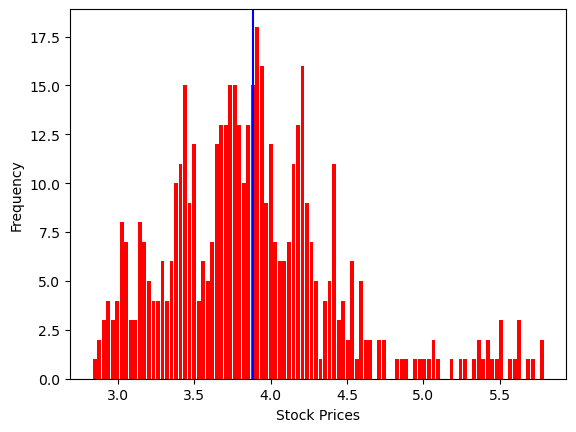

In [107]:
plt.hist(x = MCS[:,-1], bins=100, color='red', alpha=1.0, rwidth=0.85)
plt.axvline(MCS[:,-1].mean(),color='b')
plt.xlabel('Stock Prices')
plt.ylabel('Frequency')

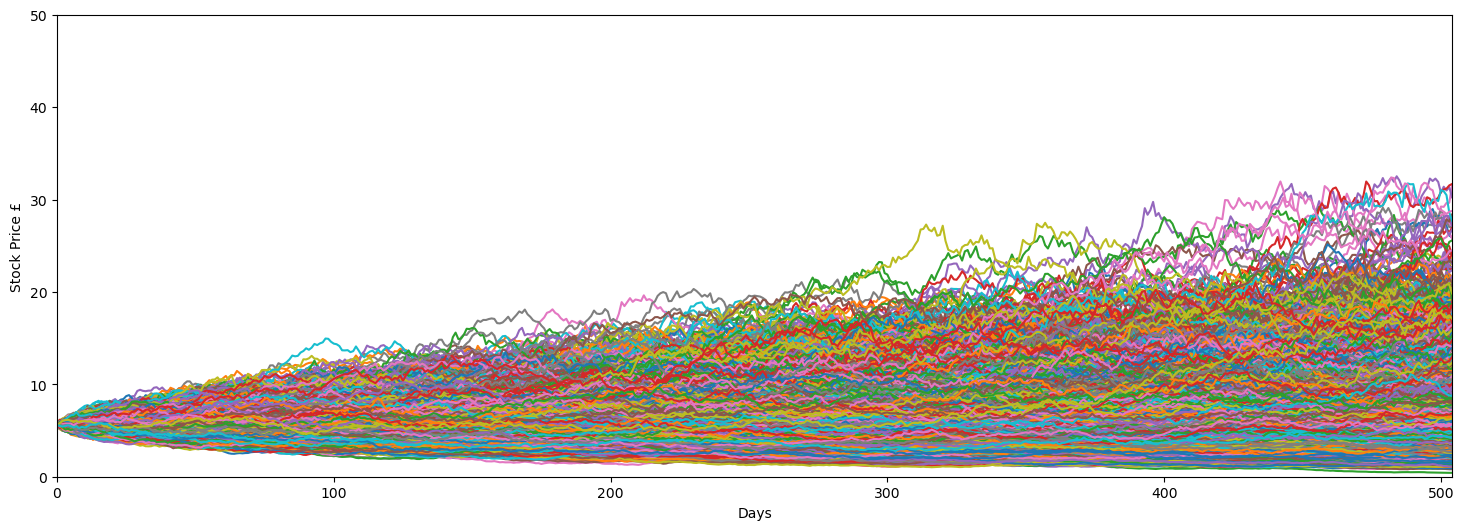

In [108]:
fig = plt.figure(figsize=(18,6))
plt.plot(MCS)
plt.xlim(0,int(T*252))
plt.ylim(0,50)
plt.xlabel('Days')
plt.ylabel('Stock Price £')
plt.show()

In [109]:
call_payoffs = np.maximum(MCS[-1] - K, 0)
put_payoffs =  np.maximum(K - MCS[-1], 0)

In [110]:
#     Calculating European Call and Put option prices
european_call_price = np.exp(-r * T) * call_payoffs.mean()
european_put_price = np.exp(-r * T) * put_payoffs.mean()

print("European Call Option Price:", european_call_price)
print("European Put Option Price:", european_put_price)

European Call Option Price: 1.6869225866149278
European Put Option Price: 0.5791630930582006


### **Black-Scholes-Merton**

In [111]:
def black_scholes(option_type, S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price


In [112]:
# Input loop for finding out the BSM option values 


while True:
    option_type = input('Which option type do you want to see? ').lower()

    if option_type == 'put':
        option_price = black_scholes('put', S0, K, T, r, sigma)
        break
    elif option_type == 'call':
        option_price = black_scholes('call', S0, K, T, r, sigma)
        break
    elif option_type == 'both':
        call_price = black_scholes('call', S0, K, T, r, sigma)
        put_price = black_scholes('put', S0, K, T, r, sigma)
        print(f'The call option price is: {call_price}')
        print(f'The put option price is: {put_price}')
        break
    else:
        print("Invalid option type. Please enter 'put' or 'call'.")
        break

Which option type do you want to see? call



## **Greeks** 

In [113]:
def black_scholes_greeks(S, K, T, r, sigma, option_type=''):
    try:
        S = float(S)
        K = float(K)
        T = float(T)
        r = float(r)
        sigma = float(sigma)

        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)

        if option_type == 'call':
            delta = norm.cdf(d1)
            gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
            theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
            rho = K * T * np.exp(-r * T) * norm.cdf(d2)
            vega = S * np.sqrt(T) * norm.pdf(d1)
        elif option_type == 'put':
            delta = -norm.cdf(-d1)
            gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
            theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
            rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
            vega = S * np.sqrt(T) * norm.pdf(d1)
        else:
            raise ValueError("Invalid option type. Use 'call' or 'put'.")

        return delta, gamma, theta, rho, vega
    except Exception as e:
        print(f"Error: {e}")
        return None

In [114]:
option_type = input('Which option type do you want to see? ').lower()

greeks = black_scholes_greeks(option_type, S0, K, T, r, sigma)

if option_type in ['call', 'put']:
    greeks = black_scholes_greeks(S0, K, T, r, sigma, option_type)

    # Display the results or error message
    if greeks is not None:
        print(f'Delta: {greeks[0]:.4f}')
        print(f'Gamma: {greeks[1]:.4f}')
        print(f'Theta: {greeks[2]:.4f}')
        print(f'Rho: {greeks[3]:.4f}')
        print(f'Vega: {greeks[4]:.4f}')
else:
    print("Invalid option type. Please enter 'call' or 'put'.")

Which option type do you want to see? call
Error: could not convert string to float: 'call'
Delta: 0.7544
Gamma: 0.1074
Theta: -0.3701
Rho: 5.0650
Vega: 2.4931


**Delta call plot**

In [115]:
S_values = np.linspace(1, 15, 100)
#T_values = np.linspace(0.1, 2, 100)
option_type = 'call' 

In [116]:
delta_values, gamma_values, theta_values, rho_values, vega_values = zip(*[black_scholes_greeks(S, K, T, r, sigma, option_type) for S in S_values])

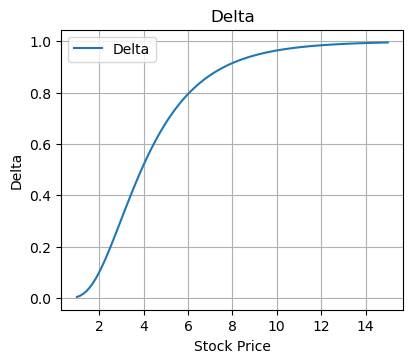

In [117]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.grid()
plt.plot(S_values, delta_values, label='Delta')
plt.title('Delta')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()


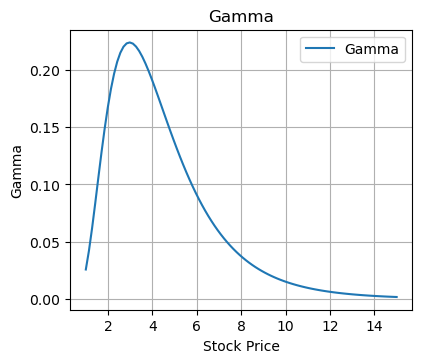

In [118]:
# Gamma Plot
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 2)
plt.plot(S_values, gamma_values, label='Gamma')
plt.grid()
plt.title('Gamma')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()

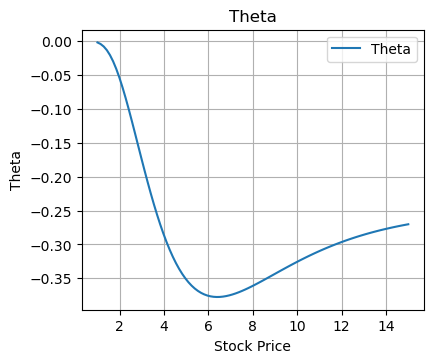

In [119]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 3)
plt.grid()
plt.plot(S_values, theta_values, label='Theta')
plt.title('Theta')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.legend()

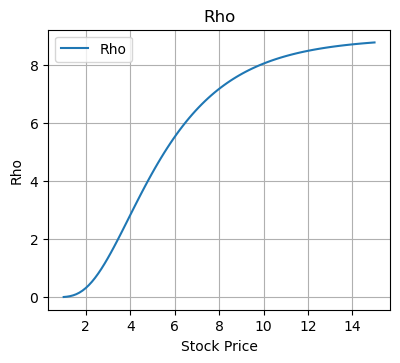

In [120]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 4)
plt.grid()
plt.plot(S_values, rho_values, label='Rho')
plt.title('Rho')
plt.xlabel('Stock Price')
plt.ylabel('Rho')
plt.legend()

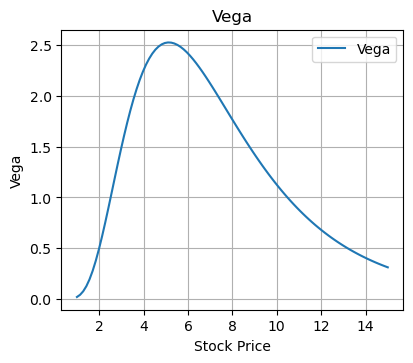

In [121]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 5)
plt.plot(S_values, vega_values, label='Vega')
plt.grid()
plt.title('Vega')
plt.xlabel('Stock Price')
plt.ylabel('Vega')
plt.legend()

In [122]:
S_values = np.linspace(1, 15, 100)
T_values = np.linspace(0.1, 2, 100)
S, T = np.meshgrid(S_values, T_values)

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Assuming you have the function black_scholes_greeks defined

def black_scholes_greeks(S, K, T, r, sigma, option_type=''):
    # ... (your existing code)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
        vega = S * np.sqrt(T) * norm.pdf(d1)
    elif option_type == 'put':
        delta = -norm.cdf(-d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
        vega = S * np.sqrt(T) * norm.pdf(d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    if any(x is None for x in [delta, gamma, theta, rho, vega]):
        return None
    return delta, gamma, theta, rho, vega

# Set up parameters
S_values = np.linspace(1, 15, 100)  # Stock prices
T_values = np.linspace(0.1, 1.5, 100)  # Time to expiration values

# Create a meshgrid for 3D plotting
S, T = np.meshgrid(S_values, T_values)

# Calculate Greeks for each stock price and time to expiration
greeks_values = [black_scholes_greeks(S_val, K, T_val, r, sigma, option_type) for S_val, T_val in zip(S.ravel(), T.ravel())]

# Filter out None values
filtered_greeks_values = [x for x in greeks_values if x is not None]

# Unpack the filtered values
delta_values, gamma_values, theta_values, rho_values, vega_values = zip(*filtered_greeks_values)

# Reshape for plotting
delta_values = np.array(delta_values).reshape(S.shape)
gamma_values = np.array(gamma_values).reshape(S.shape)
theta_values = np.array(theta_values).reshape(S.shape)
rho_values = np.array(rho_values).reshape(S.shape)
vega_values = np.array(vega_values).reshape(S.shape)


Text(0.5, 0, 'Delta')

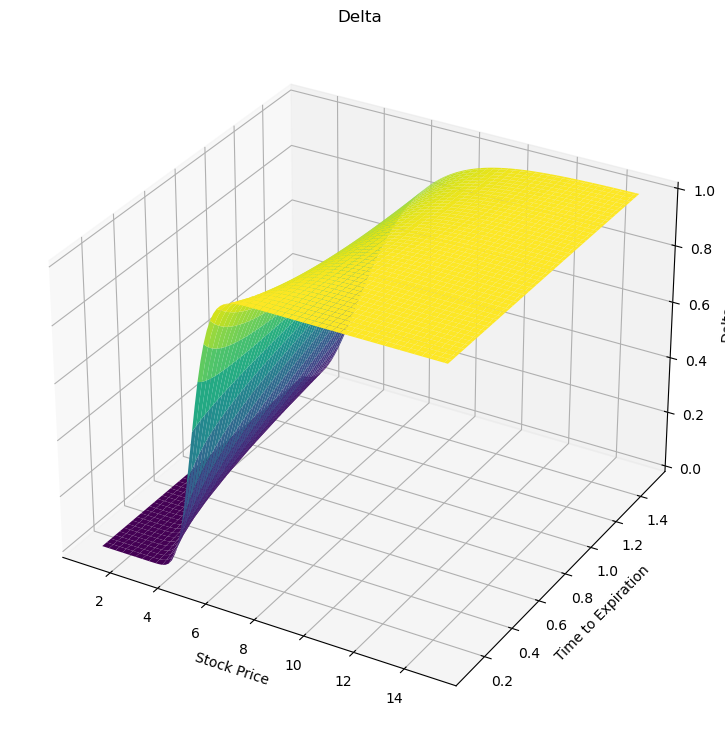

In [152]:

# Create 3D plots
fig = plt.figure(figsize=(120, 20))

# Delta
ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(S, T, delta_values, cmap='viridis')
ax1.set_title('Delta')
ax1.set_xlabel('Stock Price')
ax1.set_ylabel('Time to Expiration')
ax1.set_zlabel('Delta')




Text(0.5, 0, 'Gamma')

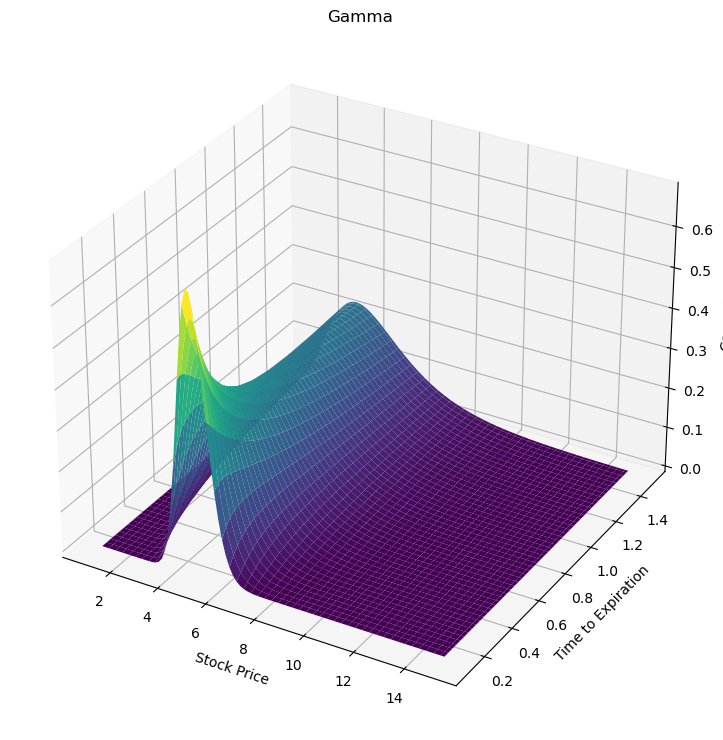

In [143]:
fig = plt.figure(figsize=(120, 20))
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(S, T, gamma_values, cmap='viridis')
ax2.set_title('Gamma')
ax2.set_xlabel('Stock Price')
ax2.set_ylabel('Time to Expiration')
ax2.set_zlabel('Gamma')


Text(0.5, 0, 'Theta')

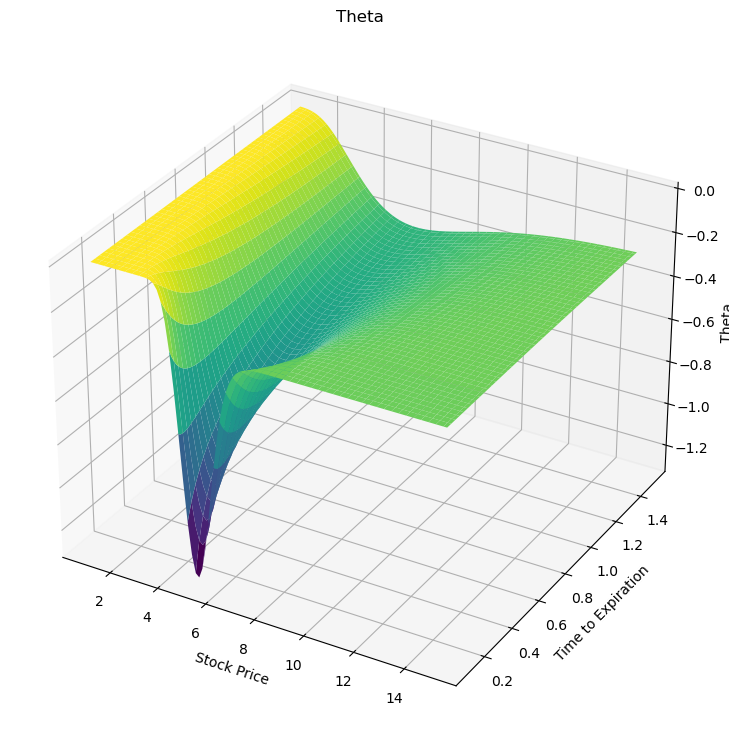

In [144]:
fig = plt.figure(figsize=(120, 20))
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(S, T, theta_values, cmap='viridis')
ax3.set_title('Theta')
ax3.set_xlabel('Stock Price')
ax3.set_ylabel('Time to Expiration')
ax3.set_zlabel('Theta')


Text(0.5, 0, 'Rho')

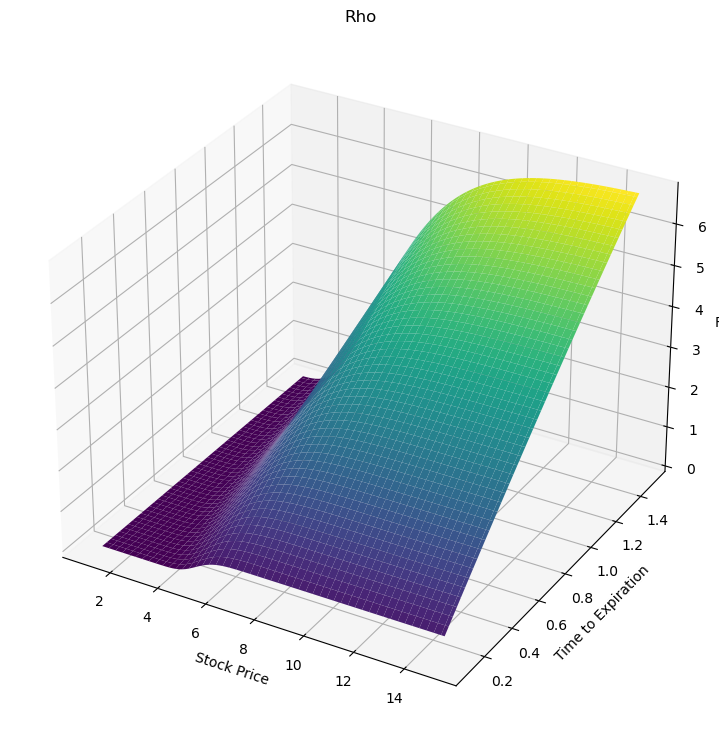

In [145]:
fig = plt.figure(figsize=(120, 20))
ax4 = fig.add_subplot(234, projection='3d')
ax4.plot_surface(S, T, rho_values, cmap='viridis')
ax4.set_title('Rho')
ax4.set_xlabel('Stock Price')
ax4.set_ylabel('Time to Expiration')
ax4.set_zlabel('Rho')


<bound method Axes3D.set of <Axes3D: title={'center': 'Vega'}>>

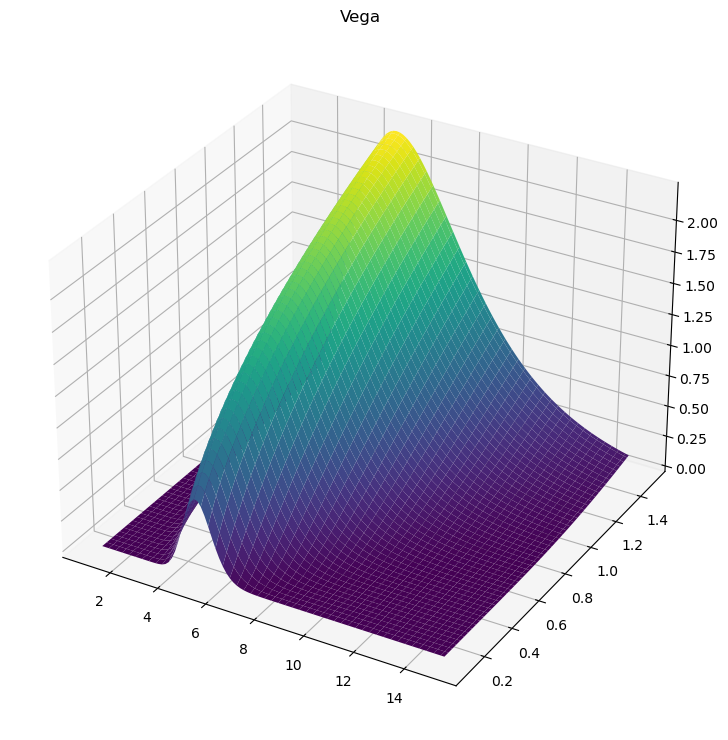

In [150]:
# Vega
fig = plt.figure(figsize=(120, 20))
ax5 = fig.add_subplot(235, projection='3d')
ax5.plot_surface(S, T, vega_values, cmap='viridis')
ax5.set_title('Vega')
ax4.set_xlabel('Stock Price')
ax4.set_ylabel('Time to Expiration')
ax4.set_zlabel('Vega')
ax5.set